In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

base_dir = "./CTCI/Panorama CTCI/Diseño/Gráficos/Funcionamiento"

Mounted at /content/drive


In [2]:
# This cell set up all the required styling

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from matplotlib.patches import FancyBboxPatch

MAIN_COLOR = "#37539C"

BLUE_PALETTE = [
    "#869CD4",
    "#4969BE",
    "#4062BB",
    "#354F95",
    "#2D4175",
    "#27355A"
]

COLOR_PALETTE = [
    MAIN_COLOR,
    "#59C3C3",
    "#F45B69",
    "#52489C",
    "#9FB7B9",
    "#EBEBEB",
    "#4062BB",
    "#46B1C9",
    "#84C0C6",
    "#BCC1BA",
    "#F2E2D2"
]

def install_open_sans():
  """Install Open Sans fonts from directory, and set them as the default
  """
  fonts_dir = "./CTCI/Panorama CTCI/Diseño/open_sans_fonts"
  for font_path in os.listdir(fonts_dir):
    full_path = os.path.join(fonts_dir, font_path)
    fontManager.addfont(full_path)

def set_properties(font_family, main_color, color_palette):
  # Set font
  mpl.rc('font', family=font_family)
  # Set font weight to bold in everything
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["font.weight"] = "bold"
  mpl.rcParams["axes.titleweight"] = "bold"
  mpl.rcParams["axes.labelweight"] = "bold"

  # Set color of text, labels and ticks
  mpl.rcParams['text.color'] = main_color
  mpl.rcParams['axes.labelcolor'] = main_color
  mpl.rcParams['xtick.color'] = main_color
  mpl.rcParams['ytick.color'] = main_color

  # Set default colormap
  mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=color_palette)

  # Set thant only left and bottom plot spines should be visible
  # (instead of a whole square around the plot)
  mpl.rcParams['axes.spines.left'] = True
  mpl.rcParams['axes.spines.bottom'] = True
  mpl.rcParams['axes.spines.right'] = False
  mpl.rcParams['axes.spines.top'] = False

  # Set horizontal grid
  mpl.rcParams["axes.grid"] = True
  mpl.rcParams["axes.grid.axis"] = "y"
  mpl.rcParams["grid.linestyle"] = "--"

  # Set default linestyle and marker
  mpl.rcParams["lines.linestyle"] = "-"
  mpl.rcParams["lines.marker"] = "o"

  # Set default DPI for image saving (300 is the mininum recommended for printing)
  mpl.rcParams['savefig.dpi'] = 300


install_open_sans()
set_properties("Open Sans", MAIN_COLOR, COLOR_PALETTE)


def round_corners(ax):
  new_patches = []
  old_bottom, old_top = ax.get_ylim()
  for patch in reversed(ax.patches):
      bb = patch.get_bbox()
      if bb.height == 0:
        new_patches.append(patch)
        continue
      color=patch.get_facecolor()
      p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                          abs(bb.width), abs(bb.height),
                          boxstyle="round,pad=-0.0040,rounding_size=0.1",
                          ec="none", fc=color,
                          mutation_aspect=4
                          )
      patch.remove()
      new_patches.append(p_bbox)
  for patch in new_patches:
      ax.add_patch(patch)

  # Fix ylim
  ax.set_ylim(old_bottom, old_top)
plt.rcParams['axes.axisbelow'] = True

## Caracterización

### Gasto en actividades I+D total y respecto al PIB

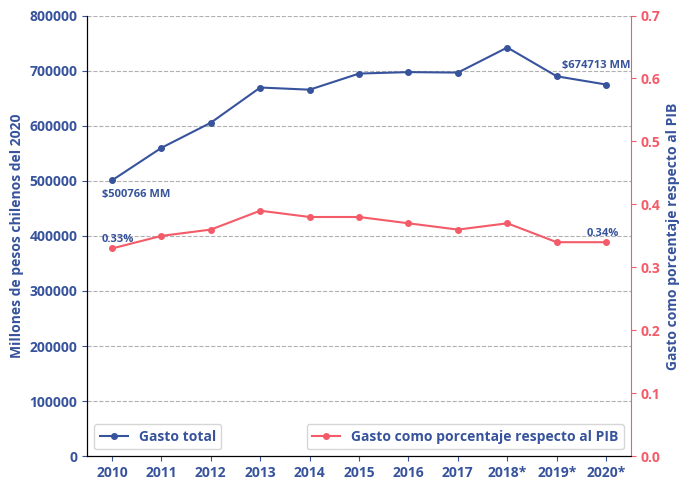

In [3]:
gasto_total = [500766, 559807,605423, 669273, 665360, 694621, 697257, 696385, 741913, 689651, 674713]
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018*', '2019*', '2020*']
gasto_pib = [0.33, 0.35, 0.36, 0.39, 0.38, 0.38, 0.37, 0.36, 0.37, 0.34, 0.34]

fig, ax = plt.subplots(figsize=(7,5))
ax.plot(years, gasto_total, '-o', label= 'Gasto total', markersize=4)
ax2 = ax.twinx()
ax2.plot(years, gasto_pib,  '-o', label='Gasto como porcentaje respecto al PIB', color=COLOR_PALETTE[2],
         markersize=4)
ax2.set_ylim((0, 0.7))
ax.set_ylim((0,800000))
ax.legend(loc='lower left')
ax2.legend(loc='lower right')

ax2.spines['right'].set_visible(True)

ax2.xaxis.label.set_color(COLOR_PALETTE[2])
ax2.tick_params(axis='y', colors=COLOR_PALETTE[2])
ax2.spines['right'].set_color(COLOR_PALETTE[2])
ax2.set_ylabel('Gasto como porcentaje respecto al PIB')
ax.grid(axis='y', linestyle='--')
ax2.grid(False, axis='y')
ax.set_ylabel('Millones de pesos chilenos del 2020')
ax.annotate('$'+str(gasto_total[0])+' MM', (-0.2, gasto_total[0]-30000), fontsize=8)
ax2.annotate(str(gasto_pib[0])+'%', (-0.2, gasto_pib[0]+0.01), fontsize=8)
ax.annotate('$'+str(gasto_total[-1])+' MM', (9.1, gasto_total[-1]+30000), fontsize=8)
ax2.annotate(str(gasto_pib[-1])+'%', (9.6, gasto_pib[-1]+0.01), fontsize=8)
plt.tight_layout()
plt.savefig(base_dir+'/gasto_ImasD_total_y_PIB.png')
plt.savefig(base_dir+'/gasto_ImasD_total_y_PIB.svg')
plt.show()

### Comparación internacional del Gasto en I+D total con respecto al PIB

In [4]:
excel = pd.read_excel(base_dir+'/gerd_as_percent_of_gdp.xlsx')
excel = excel.rename(columns={'Map area name': 'País', 'Unnamed: 1': '2020', 'Unnamed: 2': '2013'})
excel.head()

,País,2020,2013,2020_perc,2013_perc
0,Perú,0.171930,0.081740,17.193000,8.174000
1,Indonesia,0.280770,0.084700,28.077000,8.470000
2,Colombia,0.289614,0.257607,28.961406,25.760723
3,Chile,0.334963,0.390305,33.496348,39.030481
4,Ucrania,0.403180,0.733000,40.318000,73.300000


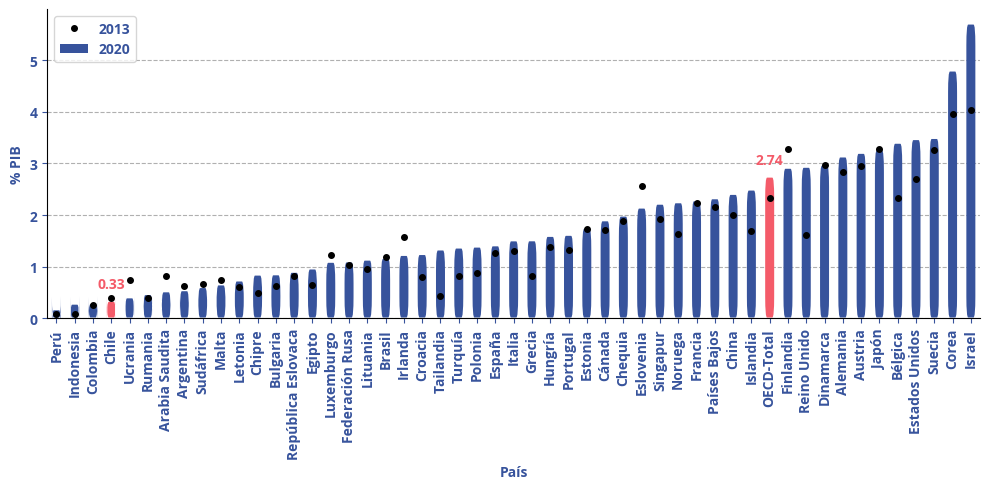

In [5]:
ax = excel.plot.bar(x='País', y='2020', figsize=(10,5), zorder=2)
ax.plot(excel['País'], excel['2013'], 'o', markersize=4, color='black', label='2013')
ax.legend()
ax.set_ylabel('% PIB')
#ax.axhline(2.74, linewidth=0.5, color='red', linestyle='--', zorder=1)
#ax.axhline(0.33, linewidth=0.5, color='red', linestyle='--', zorder=1)
#ax.set_title('Gasto total por país para I+D,\ncomo porcentaje del PIB')
#ax.set_yticks([0.33, 1, 2, 2.74, 3, 4, 5])
ax.get_children()[3].set_color(COLOR_PALETTE[2])
ax.get_children()[39].set_color(COLOR_PALETTE[2])
rects = ax.patches
for index, rect in enumerate(rects):
    if index in [3, 39]:
        height = np.round(rect.get_height(),2)
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.2, height,
                ha='center', va='bottom', color=COLOR_PALETTE[2])
round_corners(ax)
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir + '/gerd_as_percent_gdp.png')
plt.savefig(base_dir + '/gerd_as_percent_gdp.svg')
plt.show()

### Gasto I+D según fuente financiamiento

In [6]:
df = pd.read_excel(base_dir + '/gastoImasD_financiamiento.xlsx', index_col=0)
df.head()

,2013,2014,2015,2016,2017,2018*,2019*,2020*
Instituciones de Educación Superior,78254,63062,77216,98194,107368,112497,112467,126833
Estado,256817,293827,295884,317174,327691,353664,312320,284577
Internacional y Observatorios,100285,91743,89465,27232,31029,34800,37731,14233
Empresas,228667,211940,227668,244557,218645,227421,213866,234412
Instituciones Privadas Sin Fines de Lucro,5251,4788,4388,10101,11653,13532,13266,14658


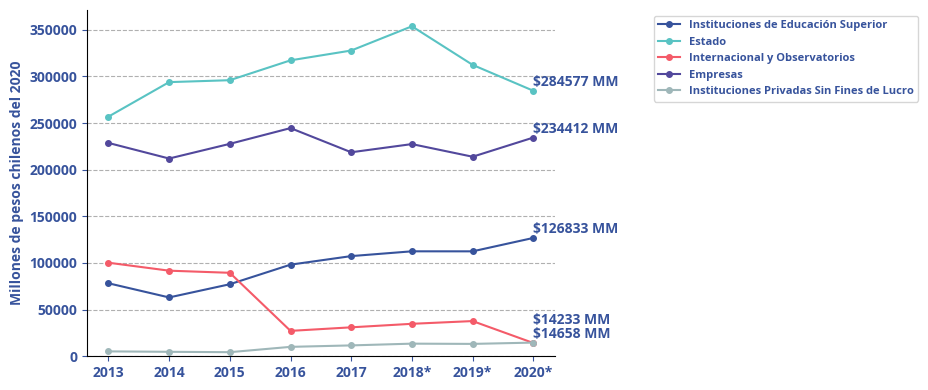

In [7]:
fig, ax = plt.subplots(figsize=(10,4))
for i, row in df.iterrows():
  ax.plot([str(j) for j in row.index], row.values, label=row.name, markersize=4)
  if i == df.index[-1]:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1, row.values[-1]+5000))
  elif i == df.index[2]:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1, row.values[-1]+20000))
  elif i == df.index[0]:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1, row.values[-1]+5000))
  elif i == df.index[1]:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1, row.values[-1]+5000))
  else:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1, row.values[-1]+5000))
ax.set_ylim(bottom=0)
ax.grid(axis='y', linestyle='--')
ax.legend(fontsize=8, bbox_to_anchor=(1.2,1))
ax.set_ylabel('Millones de pesos chilenos del 2020')
plt.tight_layout()
plt.savefig(base_dir+'/gasto_ImasD_segun_financiamiento.png')
plt.savefig(base_dir+'/gasto_ImasD_segun_financiamiento.svg')
plt.show()

### Gasto I+D según sector ejecución

In [8]:
df = pd.read_excel(base_dir + '/gastoImasD_ejecucion.xlsx', index_col=0)
df.head()

,2013,2014,2015,2016,2017,2018*,2019*,2020*
Instituciones de Educación Superior,263182,259218,267616,300234,319323,348880,338748,321119
Estado,56203,54183,54261,89912,91348,93604,77861,74584
Empresas,234247,222074,238295,262794,238180,248542,231637,239968
Instituciones Privadas Sin Fines de Lucro,27962,51298,61107,44317,47534,50888,41405,39042


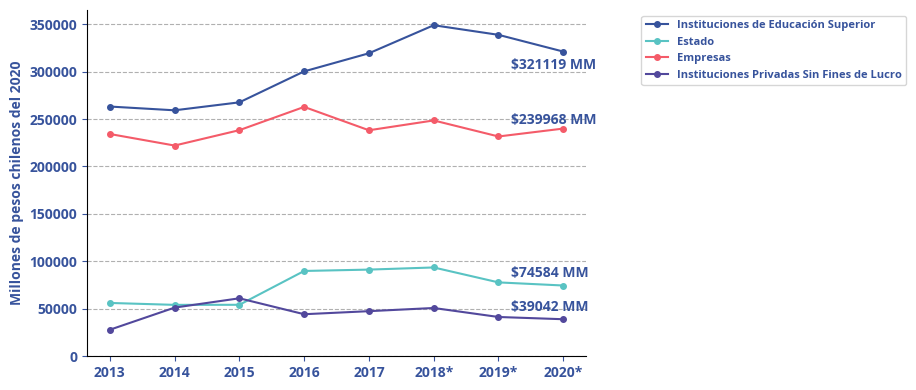

In [9]:
fig, ax = plt.subplots(figsize=(9.5,4))
for i, row in df.iterrows():
  ax.plot([str(j) for j in row.index], row.values, label=row.name, markersize=4)
  if i == df.index[0]:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1.8, row.values[-1]-18000))
  elif i == df.index[2]:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1.8, row.values[-1]+5000))
  else:
    ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1.8, row.values[-1]+9000))
ax.set_ylim(bottom=0)
ax.grid(axis='y', linestyle='--')
ax.legend(fontsize=8, bbox_to_anchor=(1.1,1))
ax.set_ylabel('Millones de pesos chilenos del 2020')
plt.tight_layout()
plt.savefig(base_dir+'/gasto_ImasD_segun_ejecucion.png')
plt.savefig(base_dir+'/gasto_ImasD_segun_ejecucion.svg')
plt.show()

### Gasto en I+D por Macrozona

In [10]:
df = pd.read_excel(base_dir + '/gastoImasD_macrozona.xlsx', index_col=0)
df = df.T
df =  df.rename(index={'Macrozona Norte': 'Macrozona\nNorte'})
df =  df.rename(index={'Macrozona Centro': 'Macrozona\nCentro'})
df =  df.rename(index={'Macrozona Metropolitana': 'Macrozona\nMetropolitana'})
df =  df.rename(index={'Macrozona Centrosur': 'Macrozona\nCentrosur'})
df =  df.rename(index={'Macrozona Sur': 'Macrozona\nSur'})
df =  df.rename(index={'Macrozona Austral': 'Macrozona\nAustral'})
df.head()

,2013,2014,2015,2016,2017
Macrozona\nNorte,49778,63738,44135,73655,53301
Macrozona\nCentro,82883,74704,62060,68810,67204
Macrozona\nMetropolitana,313769,302024,347755,378633,397642
Macrozona\nCentrosur,58929,66568,78094,84936,90015
Macrozona\nSur,51306,53904,62379,56882,55151


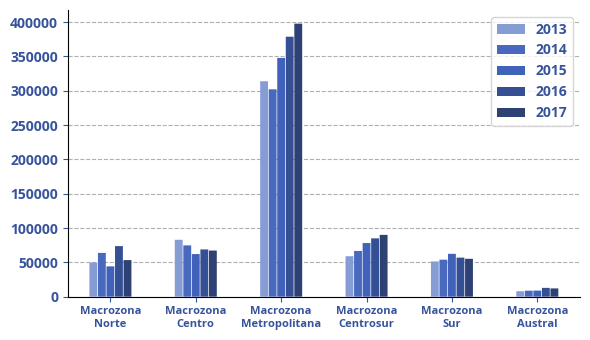

In [11]:
from matplotlib import cm
plt.rc('axes', axisbelow=True)
color = BLUE_PALETTE[:5]

fig, ax = plt.subplots(figsize=(6,3.5))
df.plot.bar(rot=0, color=color, ax=ax)
ax.tick_params(axis='x', labelsize=8)
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/gastoImasD_macrozona.png')
plt.savefig(base_dir+'/gastoImasD_macrozona.svg')
plt.show()

### Gasto ImasD según tipo I+D

In [12]:
df = pd.read_excel(base_dir + '/gastoImasD_tipo.xlsx', index_col=0)
df.head()

,2013,2014,2015,2016,2017,2018
Gasto en desarrollo experimental,152994,167610,137376,153017,147384,156449
Gasto en investigación aplicada,192509,185096,238840,238579,266196,239319
Gasto en investigación básica,124829,138471,163725,202770,199778,227894


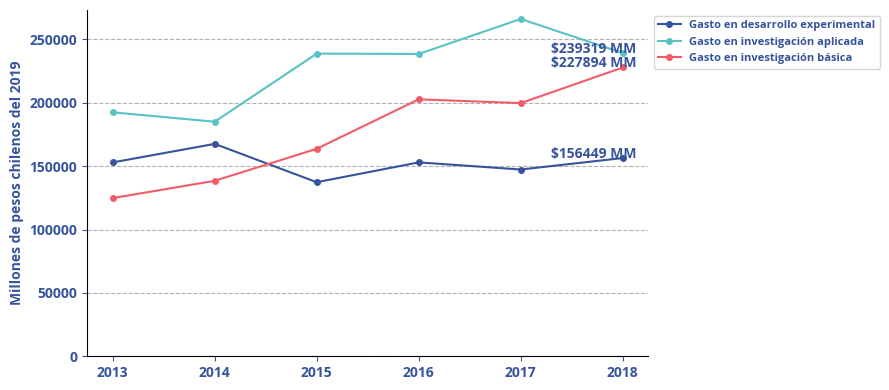

In [13]:
fig, ax = plt.subplots(figsize=(9,4))
for i, row in df.iterrows():
  ax.plot([str(j) for j in row.index], row.values, label=row.name, markersize=4)
  #if i == df.index[0]:
  #  ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-2, row.values[-1]-12000))
  #elif i == df.index[2]:
  #  ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-2.1, row.values[-1]+5000))
  #else:
  ax.annotate('$'+str(row.values[-1])+' MM', (len(row)-1.7, row.values[-1]))#+4000))
ax.set_ylim(bottom=0)
ax.grid(axis='y', linestyle='--')
ax.legend(fontsize=8, bbox_to_anchor=(1,1))
ax.set_ylabel('Millones de pesos chilenos del 2019')
plt.tight_layout()
plt.savefig(base_dir+'/gasto_ImasD_segun_tipo.png')
plt.savefig(base_dir+'/gasto_ImasD_segun_tipo.svg')
plt.show()

### Gasto I+D empresas según sector económico

In [14]:
df.index[0]

'Gasto en desarrollo experimental'

In [15]:
df = pd.read_excel(base_dir + '/gastoImasD_empresas_sectoreconom.xlsx', index_col=0, header=None)
df = df.iloc[::-1]
df =  df.rename(index={'O: Administración pública y defensa; planes de seguridad social de afiliación obligatoria ': 'O: Administración pública y defensa; planes de seguridad\nsocial de afiliación obligatoria'})
df.head()

,1
0,
O: Administración pública y defensa; planes de seguridad\nsocial de afiliación obligatoria,0
I: Actividades de alojamiento y de servicio de comidas,0
"R: Actividades artísticas, de entretenimiento y recreativas",12
L: Actividades inmobiliarias,99
P: Enseñanza,282


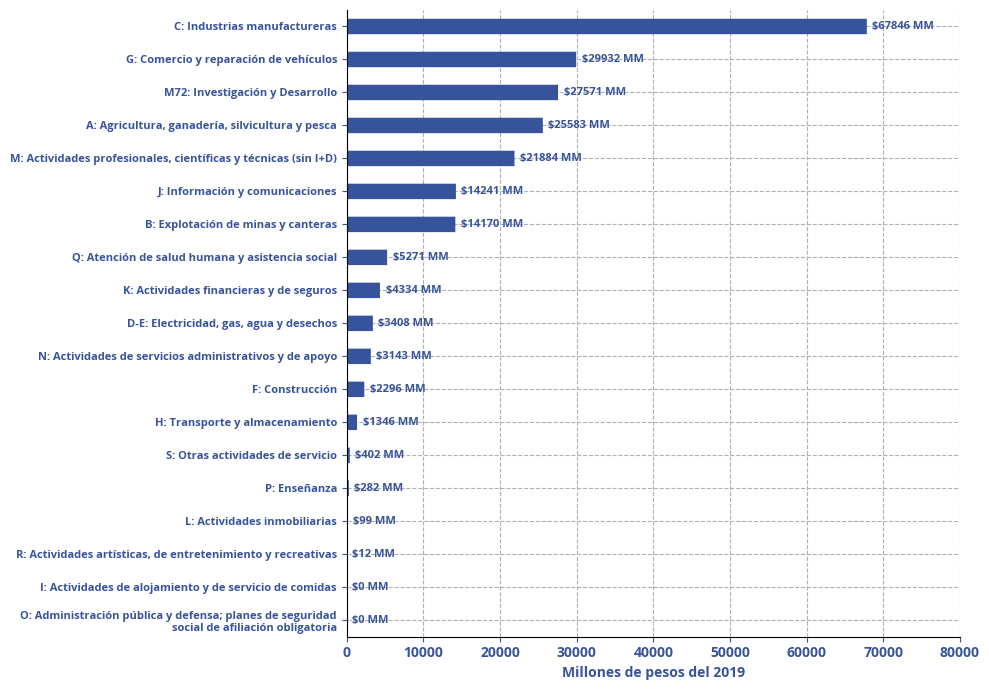

In [16]:
fig, ax = plt.subplots(figsize=(10,7))
df.plot.barh(legend=False, ax=ax)
ax.tick_params(axis='y', labelsize=8)
ax.set_ylabel(None)
ax.set_xlabel('Millones de pesos del 2019')
ax.bar_label(ax.containers[0], fmt='${:.0f} MM', fontsize=8, padding=4)
ax.set_xlim(right=80000)
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/gasto_ImasD_empresas_sector_econom.png')
plt.savefig(base_dir + '/gasto_ImasD_empresas_sector_econom.svg')
plt.show()

### Proporción del Gasto en I+D por fuente de financiamiento en América Latina y otros territorios

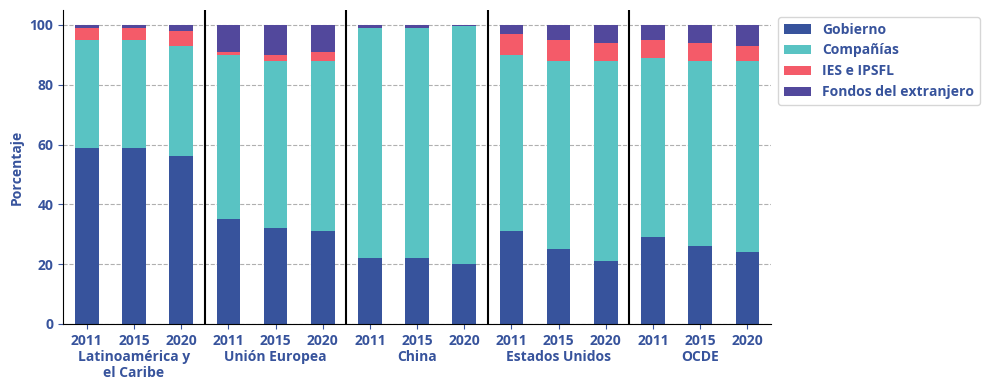

In [17]:
df = pd.DataFrame(np.transpose(
                  np.array([[59, 36, 4, 1],[59, 36, 4, 1],[56, 37, 5, 2],
                  [35, 55, 1, 9], [32, 56, 2, 10],[31, 57, 3, 9],
                   [22, 77, 0, 1],[22, 77, 0, 1],[20, 79.5, 0, 0.5],
                    [31, 59, 7, 3], [25, 63, 7, 5], [21, 67, 6, 6],
                    [29, 60, 6, 5], [26, 62, 6, 6], [24, 64, 5, 7]])),
                  columns=['2011','2015\nLatinoamérica y\nel Caribe', '2020','2011','2015\nUnión Europea', '2020','2011','2015\nChina', '2020',
                           '2011','2015\nEstados Unidos', '2020','2011','2015\nOCDE', '2020'],
                  index=['Gobierno', 'Compañías', 'IES e IPSFL', 'Fondos del extranjero']).T
fig, ax = plt.subplots(figsize=(10,4))
df.plot.bar(rot=0, ax=ax, stacked=True)
ax.legend(bbox_to_anchor=(1,1))
for i in [2.5, 5.5, 8.5, 11.5]:
  ax.axvline(i, color='black', marker=False, markersize=0.01)
ax.set_ylabel('Porcentaje')
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir+'/gastoImasD_fuentefinanciam_lac_otros.png')
plt.savefig(base_dir+'/gastoImasD_fuentefinanciam_lac_otros.svg')
plt.show()

## Presupuesto Público I+D+i

### Evolución GBARD

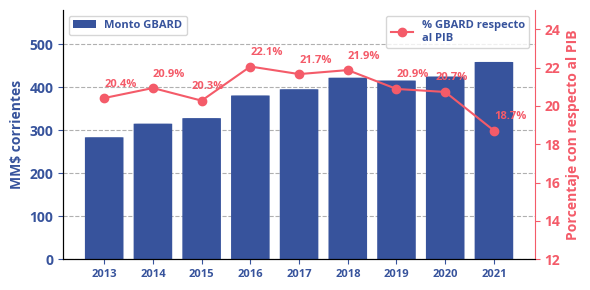

In [52]:
years = list(range(2013, 2022))
gbard = [284.044, 315.679, 328.521, 381.282, 395.750, 422.584, 416.004, 425.316, 459.168]

gbard_pib = [20.4086, 20.9309, 20.2727, 22.0516, 21.6575, 21.8663, 20.8834, 20.7250, 18.7123]
fig, ax = plt.subplots(figsize=(6,3))
ax.set_ylabel('MM$ corrientes')
ax.set_label('Año')
ax.bar(years, gbard, label='Monto GBARD')#, '-o')
ax.set_ylim((0, 580))
ax2 = ax.twinx()
ax2.plot(years, gbard_pib, '-o', color=COLOR_PALETTE[2], label='% GBARD respecto\nal PIB')
ax2.set_ylim((12,25))
ax.grid(axis='y', linestyle='--')
ax.legend(loc='upper left', fontsize=8)
for i in range(len(years)):
  if i == 2 or i == 7:
    ax2.annotate('{0:.1f}%'.format(gbard_pib[i]), (years[i]-0.2, gbard_pib[i]+0.6),#+0.2),
                fontsize=8, color=COLOR_PALETTE[2])
  else:
    ax2.annotate('{0:.1f}%'.format(gbard_pib[i]), (years[i], gbard_pib[i]+0.6),#+0.2),
               fontsize=8, color=COLOR_PALETTE[2])
ax2.legend(fontsize=8)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(COLOR_PALETTE[2])
ax2.yaxis.label.set_color(COLOR_PALETTE[2])
ax2.tick_params(axis='y', colors=COLOR_PALETTE[2])
ax2.grid(False, axis='y')
ax2.grid(False, axis='x')
ax.grid(False, axis='x')
ax2.set_ylabel('Porcentaje con respecto al PIB')
ax.set_xticks(years)
ax2.grid(False, axis='y')
ax.tick_params(axis='x', labelsize=8)
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/evol_gbard_total.png')
plt.savefig(base_dir + '/evol_gbard_total.svg')
plt.show()

### Presupuesto Público I+D respecto al PIB

In [19]:
excel = pd.read_excel(base_dir+'/gbard_as_percent_of_gdp.xlsx')
excel = excel.rename(columns={'Map area name': 'País', 'Unnamed: 1': '2021', 'Unnamed: 2': '2013'})
excel.head()

,País,2021,2013
0,Colombia,0.063798,0.088278
1,Rumania,0.117215,0.208090
2,Turquía,0.175302,0.375848
3,Chile,0.187123,0.204087
4,México,0.192723,0.306175


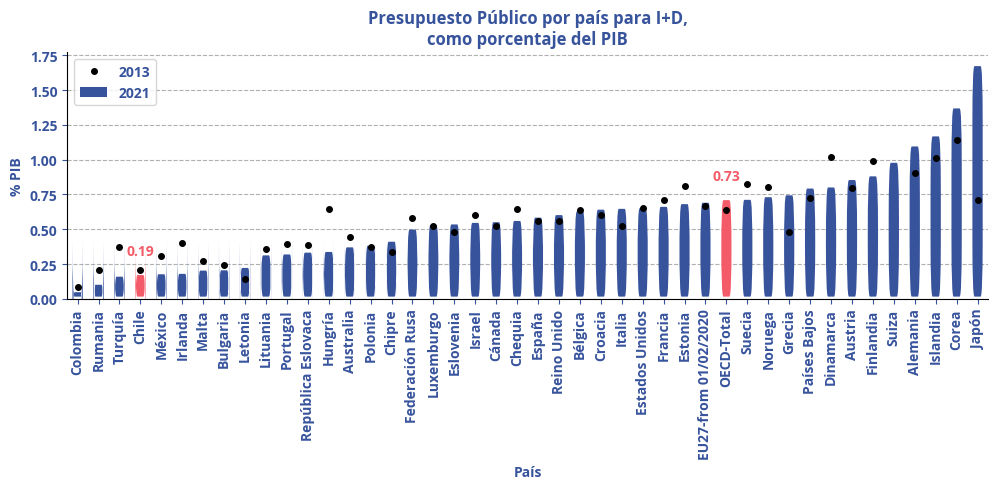

In [20]:
ax = excel.plot.bar(x='País', y='2021', figsize=(10,5), zorder=2)
ax.plot(excel['País'], excel['2013'], 'o', markersize=4, color='black', label='2013')
ax.legend(loc='upper left')
ax.set_ylabel('% PIB')
#ax.axhline(0.73, linewidth=0.5, color='red', linestyle='--', zorder=1)
#ax.axhline(0.19, linewidth=0.5, color='red', linestyle='--', zorder=1)
ax.set_title('Presupuesto Público por país para I+D,\ncomo porcentaje del PIB')
#ax.set_ylim((0,1.90))
ax.get_children()[3].set_color(COLOR_PALETTE[2])
ax.get_children()[31].set_color(COLOR_PALETTE[2])
rects = ax.patches
for index, rect in enumerate(rects):
    if index in [3, 31]:
        height = np.round(rect.get_height(),2)
        ax.text(rect.get_x() + rect.get_width() / 2, height+0.1, height,
                ha='center', va='bottom', color=COLOR_PALETTE[2])
#ax.set_yticks([0.19, 1, 0.73,2])
ax.grid(False, axis='x')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/gbard_as_percent_gdp.png')
plt.savefig(base_dir + '/gbard_as_percent_gdp.svg')
plt.show()

### Presupuesto Público I+D según Ministerio

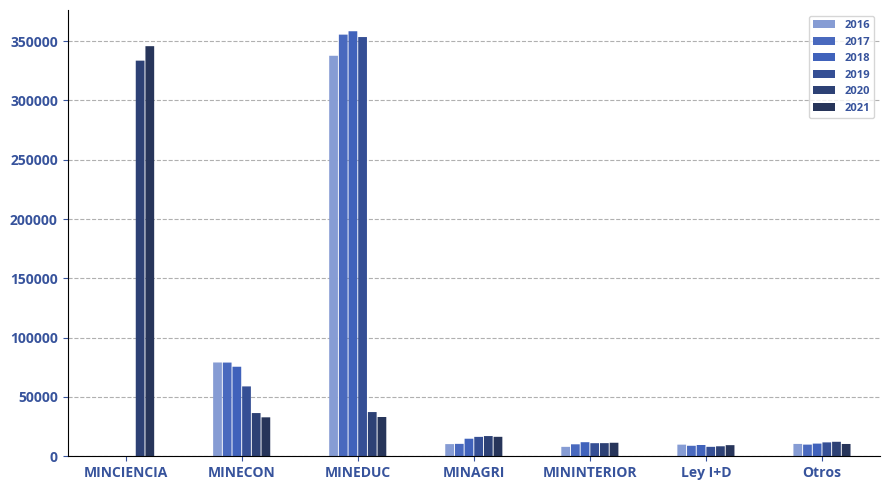

In [21]:
plt.rc('axes', axisbelow=True)
color = BLUE_PALETTE[:6]

df = pd.DataFrame({'MINCIENCIA':[np.nan, np.nan, np.nan, np.nan, 333486, 345682],
                   'MINECON':[79062, 78995, 75475, 58900, 36427, 32834],
                   'MINEDUC':[337593, 355413, 358261, 353372, 37274, 33106],
                   'MINAGRI':[10266, 10466, 14797, 16352, 17047, 16407],
                   'MININTERIOR':[7943, 10097, 11862, 11034, 11073, 11393],
                   'Ley I+D':[9801, 8856, 9508, 7956, 8420, 9377],
                   'Otros': [10409,  9831, 10685, 11715, 12210, 10370]},
                  index=list(range(2016,2022))).T
fig, ax = plt.subplots(figsize=(9,5))
df.plot.bar(ax=ax, rot=0, color=color)
ax.legend(fontsize=8)
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir+'/gbard_por_ministerio.png')
plt.savefig(base_dir+'/gbard_por_ministerio.svg')
plt.show()

### Presupuesto Público I+D por OSE

In [22]:
df = pd.read_excel(base_dir + '/Base de datos GBARD 2020-2021.xlsx')
df_0 = pd.read_excel(base_dir + '/gbard_ose_2011_2019.xlsx', index_col=0)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,Año,ITP,Cuadrante,Ministerio/ Poder/Ley,Institución,Clasificador pptario,Partida/ Asignación de Gasto,Programa/ Instrumento/ Concurso,Nombre de la Iniciativa,Código,OSE (NABS)\nCategoría,OSE (NABS)\nSubcategoría,SE,País,Región,EG,ECC,MF,GBARD (Miles $ corr.),GBARD (Miles $ del 2021)
0,2021,no,I. Financiamiento público nacional de proyecto...,MINCIENCIA,SubCiencia,30.01.01.24.03.001,Programa Exportación Servicios,Programa Exportación Servicios,Estudio de Fortalecimiento del Ecosistema CTCI,EST-01,"11. Sistemas, estructuras y procesos públicos ...",NaN,Administración pública (ADM),Chile,Región Metropolitana,sin EG,sin ECC,Concurso,200000.0,200000.0
1,2021,no,I. Financiamiento público nacional de proyecto...,MINCIENCIA,SubCiencia,30.01.01.24.03.001,Programa Exportación Servicios,Programa Exportación Servicios,Estudio de casos de éxito de Spin Offs Univers...,EST-02,"11. Sistemas, estructuras y procesos públicos ...",NaN,Administración pública (ADM),Chile,Región Metropolitana,sin EG,sin ECC,Concurso,31360.0,31360.0
2,2020,no,I. Financiamiento público nacional de proyecto...,MINCIENCIA,ANID,30.02.01.24.03.326,Fondo de Financiamiento de Centros de Investig...,Fondo de Financiamiento de Centros de Investig...,CENTRO INTERDISCIPLINARIO DE ESTUDIOS INTERCUL...,15110006,"11. Sistemas, estructuras y procesos públicos ...",NaN,Enseñanza superior (ES),Chile,Región Metropolitana,sin EG,sin ECC,Concurso,949000.0,1017328.0
3,2021,no,I. Financiamiento público nacional de proyecto...,MINCIENCIA,ANID,30.02.01.24.03.326,Fondo de Financiamiento de Centros de Investig...,Fondo de Financiamiento de Centros de Investig...,CENTRO INTERDISCIPLINARIO DE ESTUDIOS INTERCUL...,15110006,"11. Sistemas, estructuras y procesos públicos ...",NaN,Enseñanza superior (ES),Chile,Región Metropolitana,sin EG,sin ECC,Concurso,949000.0,949000.0
4,2020,no,I. Financiamiento público nacional de proyecto...,MINCIENCIA,ANID,30.02.01.24.03.326,Fondo de Financiamiento de Centros de Investig...,Fondo de Financiamiento de Centros de Investig...,CENTRO DE CIENCIA DEL CLIMA Y LA RESILENCIA (CR)2,15110009,2. Medioambiente,NaN,Enseñanza superior (ES),Chile,Región Metropolitana,sin EG,con ECC,Concurso,950000.0,1018400.0


In [23]:
for i in range(len(df)):
  if isinstance(df['OSE (NABS)\nCategoría'].iloc[i], str):
    df['OSE (NABS)\nCategoría'].iloc[i] = df['OSE (NABS)\nCategoría'].iloc[i].strip()
    if df['OSE (NABS)\nCategoría'].iloc[i] == 'No clasificable':
      df['OSE (NABS)\nCategoría'].iloc[i] = '- Otros'

<ipython-input-23-efc90007adfc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OSE (NABS)\nCategoría'].iloc[i] = df['OSE (NABS)\nCategoría'].iloc[i].strip()
<ipython-input-23-efc90007adfc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OSE (NABS)\nCategoría'].iloc[i] = '- Otros'


In [24]:
all_ose = df_0.index.values

In [25]:
all_ose

array(['1. Exploración y explotación de la Tierra', '2. Medioambiente',
       '3. Exploración y explotación del espacio',
       '4. Transporte, telecomunicaciones y otras infraestructuras',
       '5. Energía', '6. Producción y tecnología industrial',
       '7. Sanidad', '8. Agricultura', '9. Educación',
       '10. Cultura, ocio, religión y medios de comunicación',
       '11. Sistemas políticos y sociales, estructuras y procesos',
       '12. AGC: I+D financiada por FGU',
       '13. PGC: I+D financiada por otras fuentes', '14. Defensa',
       '- Otros'], dtype=object)

In [26]:
for year in [2020, 2021]:
  year_df = df[df['Año']==year]
  year_percents = []
  totalyear = year_df['GBARD (Miles $ corr.)'].sum()
  for ose in all_ose:
    ose_total = year_df[year_df['OSE (NABS)\nCategoría']==ose]['GBARD (Miles $ corr.)'].sum()
    year_percents.append(np.round(ose_total*100/totalyear,1))
  df_0[year] = year_percents

df_0

,2013,2014,2015,2016,2017,2018,2019,2020,2021
1. Exploración y explotación de la Tierra,4.362346,4.450991,5.480341,5.04861,4.65500,3.854343,4.656931,4.0,4.1
2. Medioambiente,2.536575,2.139899,2.512017,1.74501,1.66616,1.725334,1.306590,2.3,2.3
3. Exploración y explotación del espacio,2.117979,1.632416,1.595398,0.73879,0.57809,0.059945,0.038961,0.4,0.5
"4. Transporte, telecomunicaciones y otras infraestructuras",3.171687,2.827481,3.225043,1.41969,1.18870,0.937396,0.837552,0.5,0.8
5. Energía,3.326945,3.398969,2.864611,2.30882,2.59640,1.903604,1.891104,1.8,1.8
6. Producción y tecnología industrial,5.835355,5.665468,5.820370,6.87347,6.77603,3.327019,3.363308,2.5,3.3
7. Sanidad,11.081718,10.263508,8.838672,8.07478,7.76698,2.999695,3.022505,5.1,4.1
8. Agricultura,13.066619,10.085379,11.686304,16.41207,14.89981,15.720211,15.327396,12.8,13.5
9. Educación,1.832460,1.735267,1.627079,1.78002,1.47592,0.865142,0.735072,0.6,0.8
"10. Cultura, ocio, religión y medios de comunicación",0.646026,0.841882,1.081509,0.64451,0.42261,0.270425,0.152644,0.1,0.1


In [27]:
restos = []
for subtotal in df_0.iloc[:-1].sum():
  resto = 100-subtotal
  print(resto)
  restos.append(resto)

df_0.loc['- Otros'] = restos
df_0

10.436140727676516
4.418964081235998
3.9728328018348265
0.07585000000000264
0.049329999999997654
2.4900005872910924
1.6475029137825885
4.099999999999994
3.3999999999999915


,2013,2014,2015,2016,2017,2018,2019,2020,2021
1. Exploración y explotación de la Tierra,4.362346,4.450991,5.480341,5.04861,4.65500,3.854343,4.656931,4.0,4.1
2. Medioambiente,2.536575,2.139899,2.512017,1.74501,1.66616,1.725334,1.306590,2.3,2.3
3. Exploración y explotación del espacio,2.117979,1.632416,1.595398,0.73879,0.57809,0.059945,0.038961,0.4,0.5
"4. Transporte, telecomunicaciones y otras infraestructuras",3.171687,2.827481,3.225043,1.41969,1.18870,0.937396,0.837552,0.5,0.8
5. Energía,3.326945,3.398969,2.864611,2.30882,2.59640,1.903604,1.891104,1.8,1.8
6. Producción y tecnología industrial,5.835355,5.665468,5.820370,6.87347,6.77603,3.327019,3.363308,2.5,3.3
7. Sanidad,11.081718,10.263508,8.838672,8.07478,7.76698,2.999695,3.022505,5.1,4.1
8. Agricultura,13.066619,10.085379,11.686304,16.41207,14.89981,15.720211,15.327396,12.8,13.5
9. Educación,1.832460,1.735267,1.627079,1.78002,1.47592,0.865142,0.735072,0.6,0.8
"10. Cultura, ocio, religión y medios de comunicación",0.646026,0.841882,1.081509,0.64451,0.42261,0.270425,0.152644,0.1,0.1


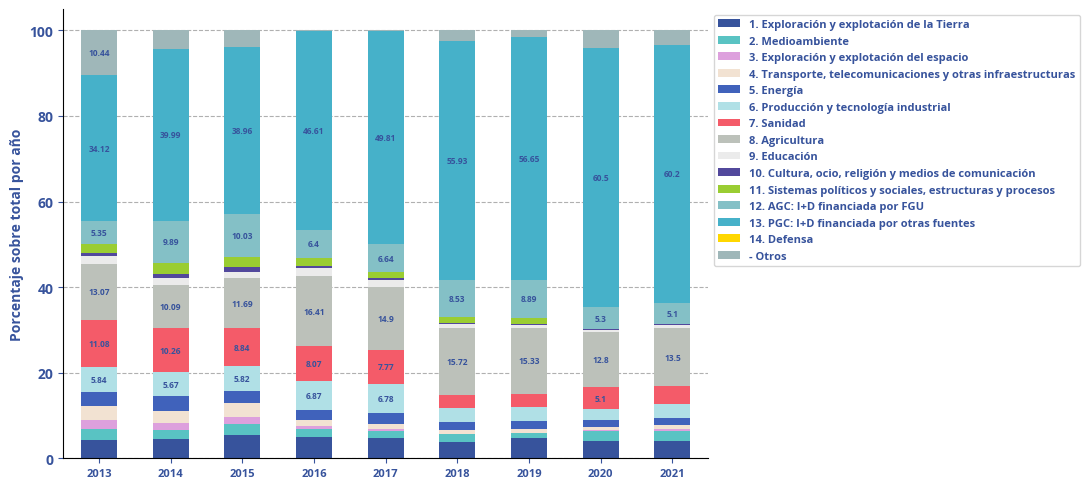

In [28]:
cm = plt.get_cmap('gist_rainbow')
colors = [COLOR_PALETTE[0], COLOR_PALETTE[1], 'plum', COLOR_PALETTE[10],
          COLOR_PALETTE[6], 'powderblue', COLOR_PALETTE[2], COLOR_PALETTE[9],
          COLOR_PALETTE[5], COLOR_PALETTE[3], 'yellowgreen', COLOR_PALETTE[8],
          COLOR_PALETTE[7], 'gold', COLOR_PALETTE[4]]
fig, ax = plt.subplots(figsize=(11,5))
ax.set_prop_cycle(color=[cm(1.*i/16) for i in range(16)])
df_0.T.plot.bar(stacked=True, ax=ax, #cmap='tab20', rot=0)
        rot=0, color=colors)
ax.legend(fontsize=8, bbox_to_anchor=(1,1))
for c in ax.containers:
  labels = [np.round(v,2) if v>5 else '' for v in c.datavalues]
  ax.bar_label(c, labels=labels, fontsize=6, label_type='center')#, fmt='%:.1f%%')
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Porcentaje sobre total por año')
ax.grid(False, axis='x')
plt.tight_layout()
plt.savefig(base_dir+'/gbard_ose.png')
plt.savefig(base_dir+'/gbard_ose.svg')
plt.show()

### Instrumentos por dim. sistémica

In [29]:
excel = pd.read_excel(base_dir+'/Base_de_datos_Estudio_CTCI.xlsx', sheet_name=2, skiprows=2)
excel.head()

,Instrumento,Agencia,Base de datos,Vigencia,Dimension sistémica,Tipo de instrumento,Tipo de Politica
0,Apoyo Complementario para Estudiantes de Postg...,ANID,Observa,2021 por lo menos,Capital Humano,Transferencia económica,Oferta
1,Becas Chile - Doctorado,ANID,Observa,2021 por lo menos,Capital Humano,Transferencia económica,Oferta
2,Becas Chile - Magíster,ANID,Observa,2021 por lo menos,Capital Humano,Transferencia económica,Oferta
3,Becas Chile - Magíster Profesionales de la Edu...,ANID,Observa,2021 por lo menos,Capital Humano,Transferencia económica,Oferta
4,Becas Chile - Posdoctorado,ANID,Observa,2021 por lo menos,Capital Humano,Transferencia económica,Oferta


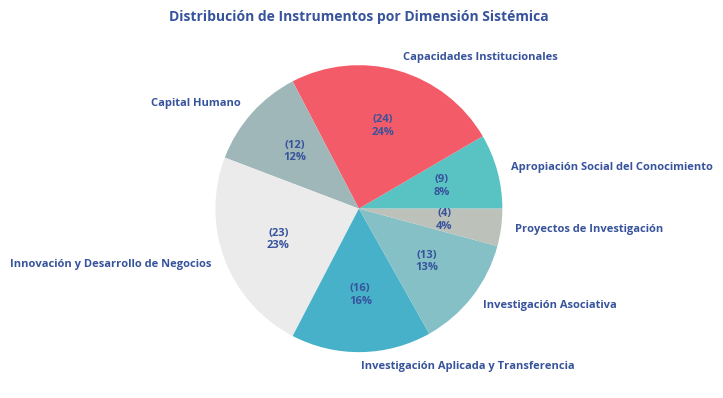

In [30]:
def label_function(val):
    return f'({val / 100 * len(excel):.0f})\n{val:.0f}%'
colors = [COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4],
          COLOR_PALETTE[5], COLOR_PALETTE[7], COLOR_PALETTE[8],
          COLOR_PALETTE[9]]
excel.groupby('Dimension sistémica').size().plot.pie(figsize=(7,7),
                                                     autopct=label_function, textprops={'fontsize': 8},
                                                     pctdistance=0.6,
                                                     colors=colors)
plt.title('Distribución de Instrumentos por Dimensión Sistémica', fontsize=10)
plt.tight_layout()
plt.savefig(base_dir + '/pie_chart_dim_sist_definit.png')
plt.savefig(base_dir + '/pie_chart_dim_sist_definit.svg')
plt.show()

### Recursos ejecutados por instrumento

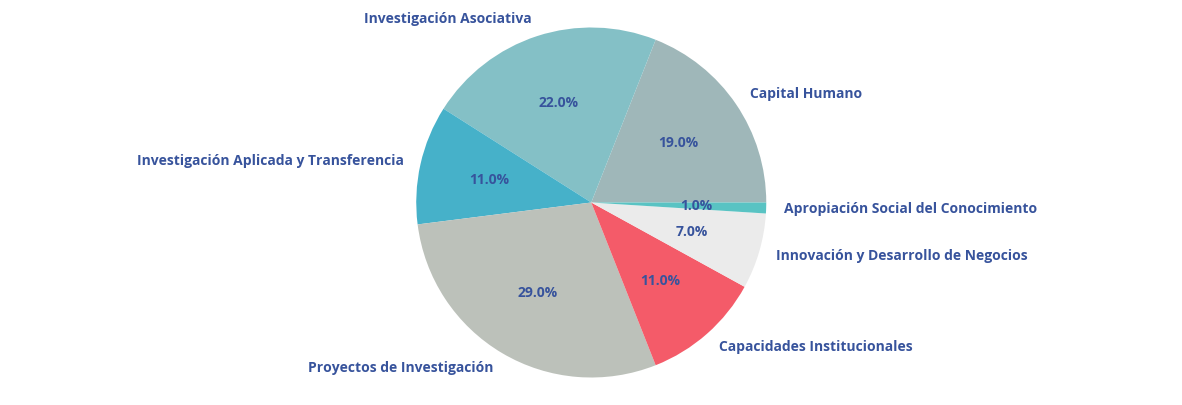

In [31]:
filename = "Instrumentos_Abril 2022.xlsx"
colors = [COLOR_PALETTE[4], COLOR_PALETTE[8], COLOR_PALETTE[7],
          COLOR_PALETTE[9], COLOR_PALETTE[2], COLOR_PALETTE[5],
          COLOR_PALETTE[1]]
excel2 = pd.read_excel(os.path.join(base_dir, filename)) # Cargar datos
dims_sist = excel2['Dimensión Sistémica'].unique()
resources = np.array([19, 22, 11, 29, 11, 7, 1])

fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.pie(resources, labels=dims_sist, autopct='%1.1f%%',
        colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig1.savefig(base_dir+'/pie_chart_resources.png')
fig1.savefig(base_dir+'/pie_chart_resources.svg')

### instrumentos según si incentivan la oferta o la demanda en I+D+i

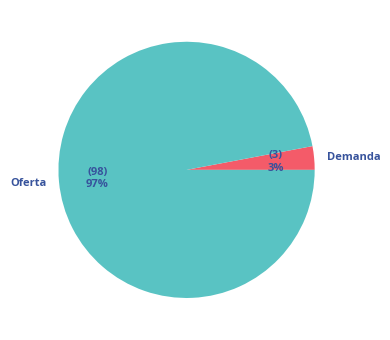

In [32]:
excel.groupby('Tipo de Politica').size().plot.pie(figsize=(4,4),
                                                     autopct=label_function, textprops={'fontsize': 8},
                                                     pctdistance=0.7,
                                                  colors=[COLOR_PALETTE[2],
                                                          COLOR_PALETTE[1]]) #, labeldistance=1.19)
#plt.title('Distribución de Instrumentos por política', fontsize=10)
plt.tight_layout()
plt.savefig(base_dir + '/pie_chart_polit_definit.png')
plt.savefig(base_dir + '/pie_chart_polit_definit.svg')
plt.show()

In [33]:
print(excel['Tipo de instrumento'].unique())

['Transferencia económica ' 'Instrumento blando' 'Instrumento regulatorio'
 'Transferencia económica']


### instrumentos según tipo de Instrumentos de Política Pública

['Transferencia económica' 'Instrumento blando' 'Instrumento regulatorio']


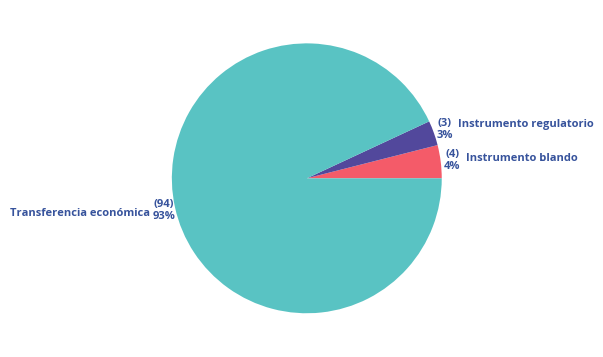

In [34]:
for i, row in excel.iterrows():
  if row['Tipo de instrumento']=='Transferencia económica ':
    excel.loc[i]['Tipo de instrumento'] = 'Transferencia económica'


excel.groupby('Tipo de instrumento').size().plot.pie(figsize=(6,6),
                                                     autopct=label_function, textprops={'fontsize': 8},
                                                     pctdistance=1.085, labeldistance=1.19,
                                                     colors=[COLOR_PALETTE[2], COLOR_PALETTE[3], COLOR_PALETTE[1]])
#plt.title('Distribución de Instrumentos por tipo', fontsize=10)
print(excel['Tipo de instrumento'].unique())
plt.tight_layout()
plt.savefig(base_dir + '/pie_chart_tipo_definit.png')
plt.savefig(base_dir + '/pie_chart_tipo_definit.svg')
plt.show()

### Empresas ejecutando proyecto bajo Ley I+D y montos certificados


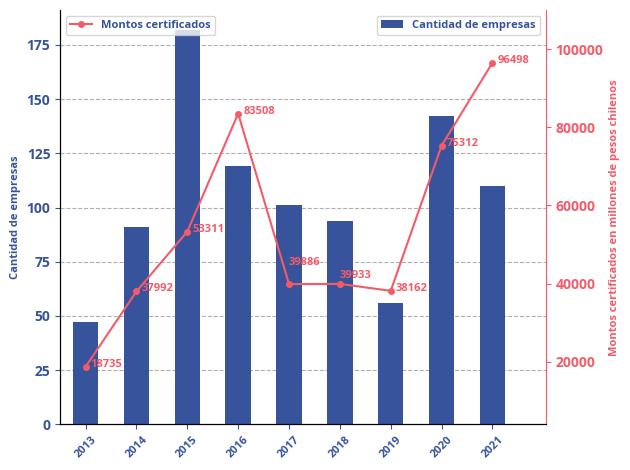

In [35]:
montos=[18735, 37992, 53311, 83508, 39886, 39933, 38162, 75312, 96498]
years = [str(i) for i in list(range(2013, 2022))]
cantid_empresas = [47, 91, 182, 119, 101, 94, 56, 142, 110]

df=pd.DataFrame({'Montos certificados': montos, 'Cantidad de empresas': cantid_empresas},
                index=years)

fig,ax=plt.subplots()
#fig, ax = plt.subplots(figsize=(5,3))
#df['Cantidad de empresas'].plot.bar(kind0ax=ax)
ax= df['Cantidad de empresas'].plot(x=years, kind='bar')
ax2=df['Montos certificados'].plot(x=years, kind='line', color=COLOR_PALETTE[2],
                               secondary_y = True, ax=ax, markersize=4)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(COLOR_PALETTE[2])
ax2.yaxis.label.set_color(COLOR_PALETTE[2])
ax2.tick_params(axis='y', colors=COLOR_PALETTE[2])
ax2.grid(False, axis='y')
ax2.grid(False, axis='x')
ax.grid(False, axis='x')
ax.tick_params(axis='x', labelsize=8, rotation=45)
#ax.legend(fontsize=8, loc='upper rigth')
ax2.legend(['Montos certificados'], fontsize=8, loc='upper left')
ax2.set_ylim(4000, 110000)
ax.legend(fontsize=8)
ax.grid(axis='y', linestyle='--')
for i in range(len(montos)):
  if i == 4:
    ax2.annotate(montos[i], (i,montos[i]+5000), fontsize=8, color=COLOR_PALETTE[2])
  elif i == 5:
    ax2.annotate(montos[i], (i, montos[i]+1500), fontsize=8, color=COLOR_PALETTE[2])
  elif i == 6:
    ax2.annotate(montos[i], (i+0.1,montos[i]), fontsize=8, color=COLOR_PALETTE[2])
  else:
    ax2.annotate(montos[i], (i+0.1,montos[i]), fontsize=8, color=COLOR_PALETTE[2])
ax.set_ylabel('Cantidad de empresas', fontsize=8)
ax2.set_ylabel('Montos certificados en millones de pesos chilenos', fontsize=8)
ax.set_xlim(right=9.05)
plt.tight_layout()
plt.savefig(base_dir + '/empresas_montos_certificados_ImasD.png')
plt.savefig(base_dir + '/empresas_montos_certificados_ImasD.svg')
plt.show()

### Comparación internacional del financiamiento público I+D diferenciado según incentivo tributario y financiamiento directo

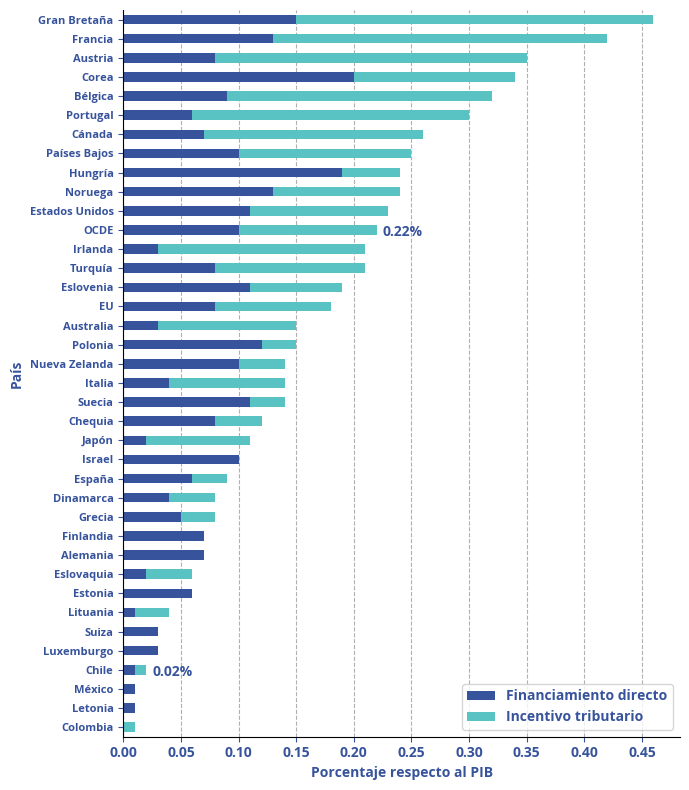

In [36]:
df = pd.DataFrame({'Gran Bretaña': [0.15, 0.31], 'Francia':[0.13,0.29], 'Austria':[0.08,0.27],
                   'Corea':[0.2,0.14], 'Bélgica':[0.09,0.23], 'Portugal':[0.06,0.24], 'Cánada':[0.07,0.19], 'Países Bajos':[0.1,0.15],
                   'Hungría':[0.19,0.05], 'Noruega':[0.13,0.11], 'Estados Unidos':[0.11, 0.12], 'OCDE':[0.1,0.12], 'Irlanda':[0.03,0.18],
                   'Turquía':[0.08,0.13], 'Eslovenia':[0.11,0.08], 'EU':[0.08,0.1], 'Australia':[0.03,0.12], 'Polonia':[0.12,0.03],
                   'Nueva Zelanda':[0.1,0.04], 'Italia':[0.04,0.1], 'Suecia':[0.11,0.03], 'Chequia':[0.08,0.04], 'Japón':[0.02,0.09],
                   'Israel':[0.1,0], 'España':[0.06,0.03], 'Dinamarca':[0.04,0.04], 'Grecia':[0.05,0.03], 'Finlandia':[0.07,0],
                   'Alemania':[0.07,0], 'Eslovaquia':[0.02,0.04], 'Estonia':[0.06,0], 'Lituania':[0.01,0.03], 'Suiza':[0.03,0],
                   'Luxemburgo':[0.03,0], 'Chile':[0.01,0.01], 'México':[0.01,0], 'Letonia':[0.01,0], 'Colombia':[0,0.01]}, index=[
                       'Financiamiento directo', 'Incentivo tributario'
                   ]).T
df = df.iloc[::-1]
fig, ax = plt.subplots(figsize=(7,8))
df.plot.barh(stacked=True, ax=ax)
ax.text(0.22+0.005, 26-0.3, str(0.22)+'%')
ax.text(0.02+0.005, 3-0.3, str(0.02)+'%')
ax.tick_params(axis='y', labelsize=8)
ax.grid(axis='x', linestyle='--')
ax.set_xlabel('Porcentaje respecto al PIB')
ax.set_xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45])
ax.set_ylabel('País')
ax.grid(False, axis='y')
plt.tight_layout()
plt.savefig(base_dir+'/financiamientoImasD_internacional.png')
plt.savefig(base_dir+'/financiamientoImasD_internacional.svg')
plt.show()

## Beneficiarios del apoyo público a la I+D+i

### Proyectos beneficiarios de anid por región de ejecución

In [37]:
df = pd.read_excel(base_dir + '/anid_cantidad_proyectos.xlsx', index_col=0).T
df.head()

Año,2015,2016,2017,2018,2019,2020,2021
Arica y Parinacota,18,28,23,28,22,31,21
Tarapacá,19,17,16,31,19,15,11
Antofagasta,76,79,87,81,69,53,55
Atacama,12,14,8,12,13,9,11
Coquimbo,55,57,50,59,42,32,28


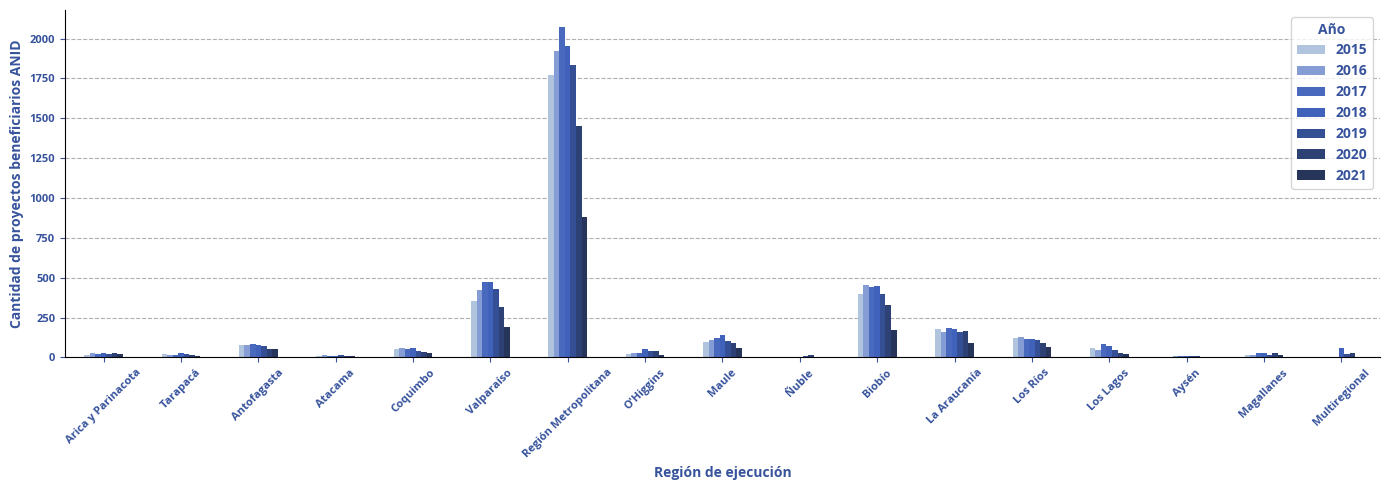

In [38]:
from matplotlib import cm
fig, ax = plt.subplots(figsize=(14,5))
color = ['lightsteelblue'] + BLUE_PALETTE[:6]
df.plot.bar(ax=ax, rot=45, color=color)
ax.grid(axis='y', linestyle='--')
ax.grid(False, axis='x')
ax.set_ylabel('Cantidad de proyectos beneficiarios ANID')
ax.set_xlabel('Región de ejecución')
ax.tick_params(labelsize=8)
plt.tight_layout()
plt.savefig(base_dir + '/anid_reg_ejecucion.png')
plt.savefig(base_dir + '/anid_reg_ejecucion.svg')
plt.show()

### Tipo de beneficiario por tipo de agencia

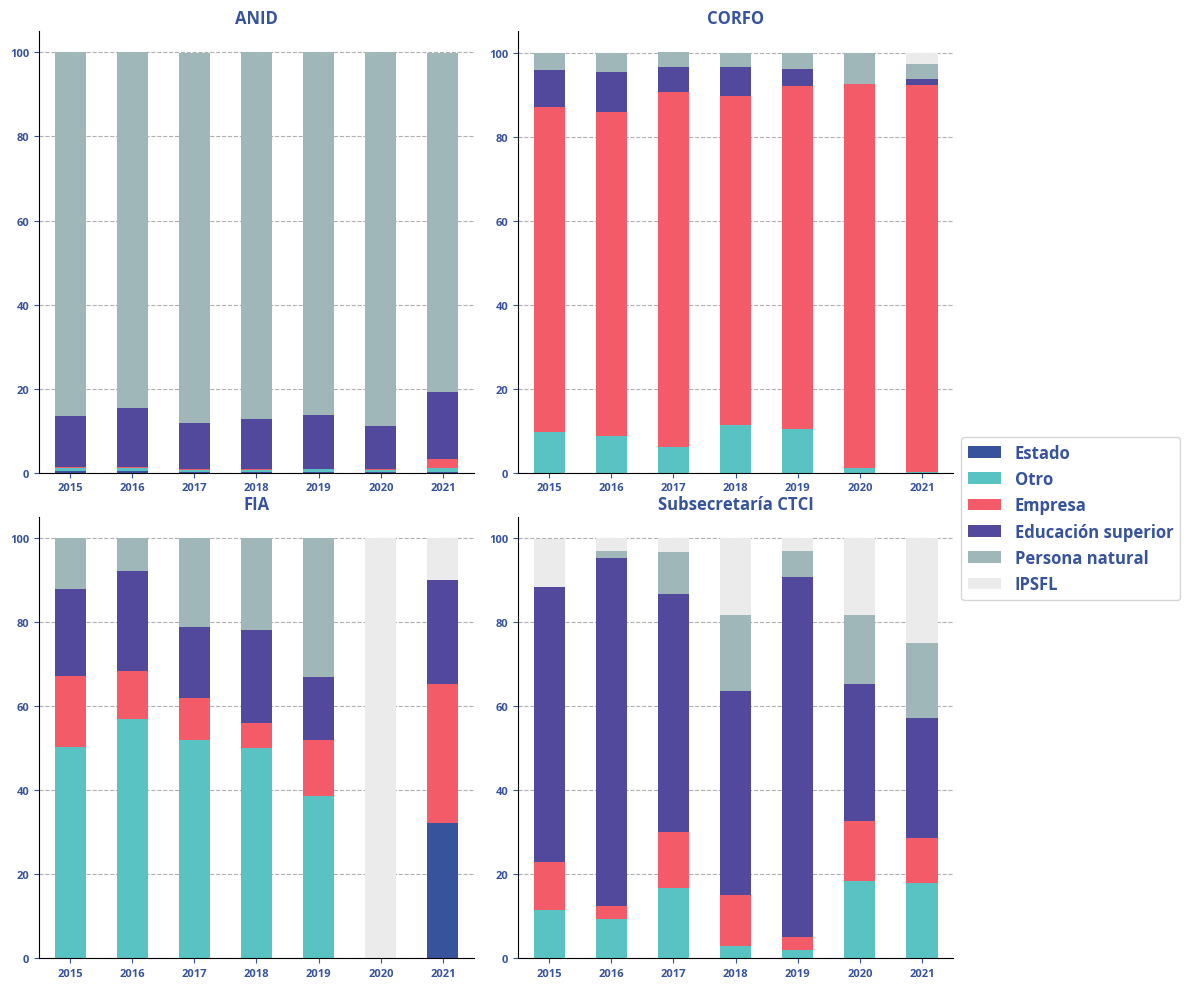

In [39]:
df0 = pd.read_excel(base_dir+'/tipo_benef_ANID.xlsx', index_col=0).T
df1 = pd.read_excel(base_dir+'/tipo_benef_CORFO.xlsx', index_col=0).T
df2 = pd.read_excel(base_dir+'/tipo_benef_FIA.xlsx', index_col=0).T
df3 = pd.read_excel(base_dir+'/tipo_benef_subsec.xlsx', index_col=0).T
df1['Estado'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
df3['Estado'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
df0['IPSFL'] = [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

df1 = df1[df0.columns.tolist()]
df2 = df2[df0.columns.tolist()]
df3 = df3[df0.columns.tolist()]

fig, ax = plt.subplots(2,2,figsize=(12,10))
df0.plot.bar(stacked=True, ax=ax[0,0], rot=0, legend=False)
ax[0,0].tick_params(axis='both', labelsize=8)
#ax[0,0].legend(fontsize=8)
ax[0,0].set_title('ANID')
df1.plot.bar(stacked=True, ax=ax[0,1], rot=0)
ax[0,1].tick_params(axis='both', labelsize=8)
ax[0,1].legend(fontsize=12, bbox_to_anchor=(1,0.1))
ax[0,1].set_title('CORFO')
df2.plot.bar(stacked=True, ax=ax[1,0], rot=0, legend=False)
ax[1,0].tick_params(axis='both', labelsize=8)
#ax[1,0].legend(fontsize=8)
ax[1,0].set_title('FIA')
df3.plot.bar(stacked=True, ax=ax[1,1], rot=0, legend=False)
ax[1,1].tick_params(axis='both', labelsize=8)
#ax[1,1].legend(fontsize=8)
ax[1,1].set_title('Subsecretaría CTCI')
ax[0,0].grid(False, axis='x')
ax[1,0].grid(False, axis='x')
ax[0,1].grid(False, axis='x')
ax[1,1].grid(False, axis='x')
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig(base_dir+'/tipo_benef.png')
plt.savefig(base_dir+'/tipo_benef.svg')
plt.show()

### Porcentaje de empresas que utiliza financiamiento público para innovar entre aquellas que innovan
https://www.observa.minciencia.gob.cl/encuesta/encuesta-nacional-de-innovacion

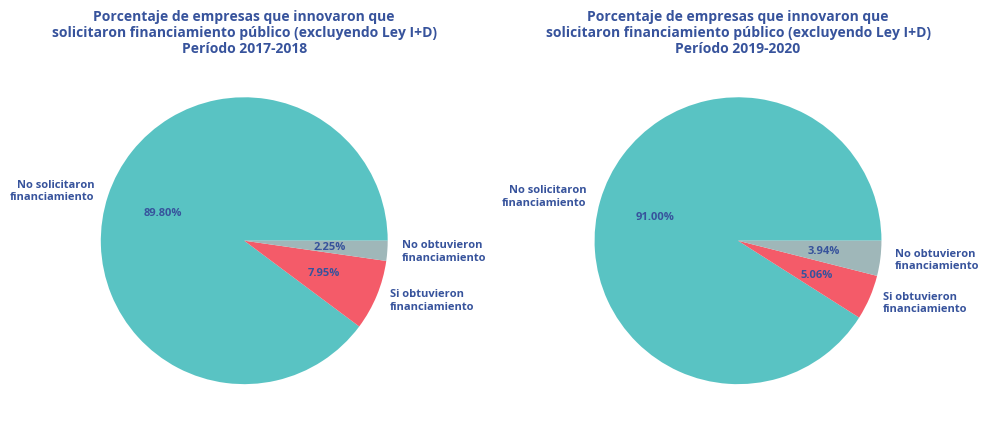

In [40]:
periodo = ['2017-2018', '2019-2020']
no_solicitaron_financ=[89.8, 91]
no_financ = [2.2542, 3.942]
financ = [7.9458, 5.058]
colors=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4]]

for i in range(len(no_financ)):
  assert (no_solicitaron_financ[i] + no_financ[i] + financ[i] > 98) and (no_solicitaron_financ[i] + no_financ[i] + financ[i] < 101)

fig, axs = plt.subplots(1,2, figsize=(10,5))
langs = ['No solicitaron\nfinanciamiento', 'Si obtuvieron\nfinanciamiento', 'No obtuvieron\nfinanciamiento']
vals_2017 = [no_solicitaron_financ[0], financ[0], no_financ[0]]
axs[0].set_title('Porcentaje de empresas que innovaron que\nsolicitaron financiamiento público (excluyendo Ley I+D)\nPeríodo 2017-2018',
                 fontsize=10)
axs[0].pie(vals_2017, labels = langs,autopct='%1.2f%%', textprops={'fontsize': 8},
           colors=colors)
vals_2019 = [no_solicitaron_financ[1], financ[1], no_financ[1]]
axs[1].set_title('Porcentaje de empresas que innovaron que\nsolicitaron financiamiento público (excluyendo Ley I+D)\nPeríodo 2019-2020',
                 fontsize=10)
axs[1].pie(vals_2019, labels = langs,autopct='%1.2f%%', textprops={'fontsize': 8},
           colors=colors)
plt.tight_layout()
plt.savefig(base_dir+'/empresas_innov_financ_pub.png')
plt.savefig(base_dir+'/empresas_innov_financ_pub.svg')
plt.show()

### Porcentaje de empresas que hacen I+D que utilizan la Ley I+D
https://www.observa.minciencia.gob.cl/encuesta/encuesta-nacional-de-innovacion

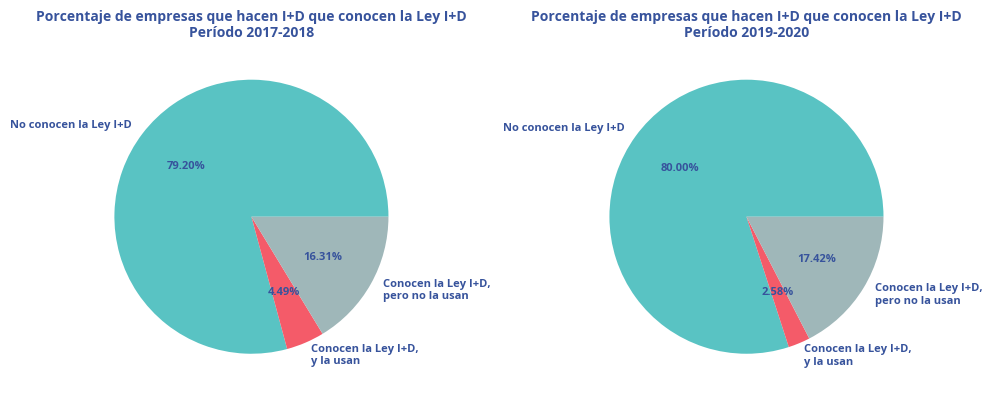

In [41]:
years = ['2019-2020', '2017-2018']
ImasD_no_conocen = [79.2, 80]
ImasD_conocen_y_usan = [4.4928, 2.58]
ImasD_conocen_y_no_usan = [16.3072, 17.42]
colors=[COLOR_PALETTE[1], COLOR_PALETTE[2], COLOR_PALETTE[4]]

for i in range(len(no_financ)):
  assert (ImasD_no_conocen[i] + ImasD_conocen_y_usan[i] + ImasD_conocen_y_no_usan[i] > 98) and (ImasD_no_conocen[i] + ImasD_conocen_y_usan[i] + ImasD_conocen_y_no_usan[i] < 101)

fig, axs = plt.subplots(1,2, figsize=(10,5))
langs = ['No conocen la Ley I+D', 'Conocen la Ley I+D,\ny la usan','Conocen la Ley I+D,\npero no la usan']
vals_2017 = [ImasD_no_conocen[0], ImasD_conocen_y_usan[0], ImasD_conocen_y_no_usan[0]]
axs[0].set_title('Porcentaje de empresas que hacen I+D que conocen la Ley I+D\nPeríodo 2017-2018',
                 fontsize=10)
axs[0].pie(vals_2017, labels = langs,autopct='%1.2f%%', textprops={'fontsize': 8},
           colors= colors)
vals_2019 = [ImasD_no_conocen[1], ImasD_conocen_y_usan[1], ImasD_conocen_y_no_usan[1]]
axs[1].set_title('Porcentaje de empresas que hacen I+D que conocen la Ley I+D\nPeríodo 2019-2020',
                 fontsize=10)
axs[1].pie(vals_2019, labels = langs,autopct='%1.2f%%', textprops={'fontsize': 8},
           colors=colors)
plt.tight_layout()
plt.savefig(base_dir+'/empresas_ImasD_ley_ImasD.png')
plt.savefig(base_dir+'/empresas_ImasD_ley_ImasD.svg')
plt.show()

## Infraestructura habilitante


### Cantidad de equipos FONDEQUIP instalados por región

In [42]:
excel = pd.read_excel(base_dir + '/equipos.xlsx')

excel.head()

,Folio,Programa,Institución,Región Instalación del Equipo,Tipo de Equipamiento,Equipo,Marca,Modelo,Coordinador Responsable,Email
0,EQY220026,FONDEQUIP,UNIVERSIDAD DE LA SERENA,Región de Coquimbo,Otros,ULTRA-HIGH-PRESSURE FOOD PROCESSING SYSTEM,Resato,FPU-10.000 2L,VILBETT BRIONES,vbriones@userena.cl
1,EQY220018,FONDEQUIP,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,Región Metropolitana,Otros,HIGH RESOLUTION MASS SPECTROMETER,Waters,SYNAPT XS HDMS 8K,Mario Aranda,mario.aranda@uc.cl
2,EQY220014,FONDEQUIP,UNIVERSIDAD MAYOR,Región Metropolitana,Otros,INTEGRATED ISCAN PLATFORM,Illunmina,iScan System,Ricardo Ramires,ramiresfernandez@gmail.com
3,EQY220001,FONDEQUIP,UNIVERSIDAD DE CONCEPCION,Región del Bío-Bío,Otros,MICROSONDA ELECTRÓNICA,JEOL,JXA-iSP100,Laura Hernández,lahernan@udec.cl
4,EQY210015,FONDEQUIP,UNIVERSIDAD DE SANTIAGO DE CHILE,Región Metropolitana,Otros,MULTI-SITE POWER SYSTEM REAL TIME SIMULATOR WI...,OPAL RT,OPAL RT,HECTOR CHAVEZ,hector.chavez@usach.cl


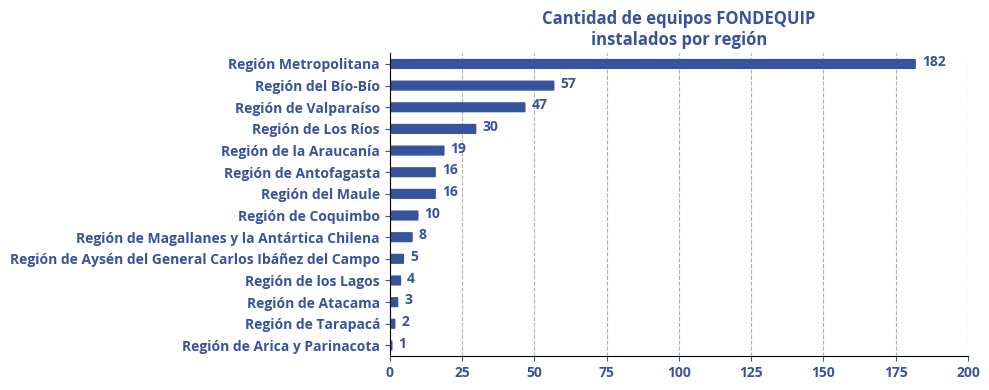

In [43]:
regiones = []
for i in excel['Región Instalación del Equipo']:
  regiones.append(i)

df_regiones = pd.DataFrame({'Regiones': np.flip(np.unique(np.array(regiones))),
                                 'Frecuencia': np.zeros(len(np.unique(np.array(regiones))), dtype=int)})
df_regiones.set_index('Regiones', inplace=True)

for i in regiones:
  df_regiones.loc[i] += 1

df_regiones = df_regiones.sort_values(by='Frecuencia', ascending=True)
ax = df_regiones.plot.barh(legend=False, figsize=(10,4))#(y='Frecuencia', autopct='%1.1f%%', textprops={'fontsize': 8},
                        #  colors=['skyblue', 'orange'])
plt.ylabel(None)
plt.title(' ')
for i, v in enumerate(df_regiones['Frecuencia']):
    ax.text(v + 2, i - 0.1, str(v))
plt.xlim((0,200))
plt.title('Cantidad de equipos FONDEQUIP\ninstalados por región')
round_corners(ax)
ax.grid(False, axis='y')
plt.tight_layout()
plt.savefig(base_dir + '/regiones_equipams.png')
plt.savefig(base_dir + '/regiones_equipams.svg')
plt.show()

### Distribución de las instituciones que recibieron equipamiento FONDEQUIP

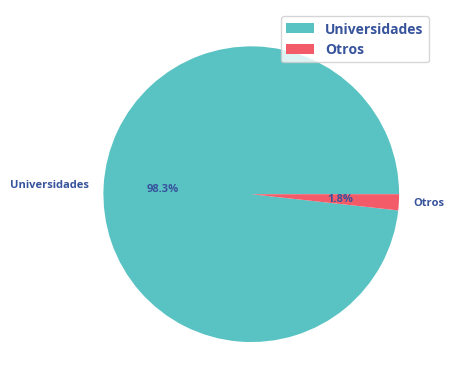

In [44]:
instituciones = []
for i in excel['Institución']:
  if 'UNIVERSIDAD' in i:
    instituciones.append('Universidades')
  else:
    instituciones.append('Otros')

df_instituciones = pd.DataFrame({'Instituciones': np.flip(np.unique(np.array(instituciones))),
                                 'Frecuencia': np.zeros(len(np.unique(np.array(instituciones))), dtype=int)})
df_instituciones.set_index('Instituciones', inplace=True)

for i in instituciones:
  df_instituciones.loc[i] += 1

df_instituciones.plot.pie(y='Frecuencia', autopct='%1.1f%%', textprops={'fontsize': 8},
                          colors=[COLOR_PALETTE[1], COLOR_PALETTE[2]])
plt.ylabel(None)
#plt.title('Tipo de instituciones donde se otorgó\nequipamiento/s por FONDEQUIP')
plt.savefig(base_dir + '/instituciones_equipams.png')
plt.savefig(base_dir + '/instituciones_equipams.svg')
plt.show()

### Distribución por tipo de equipamiento FONDEQUIP

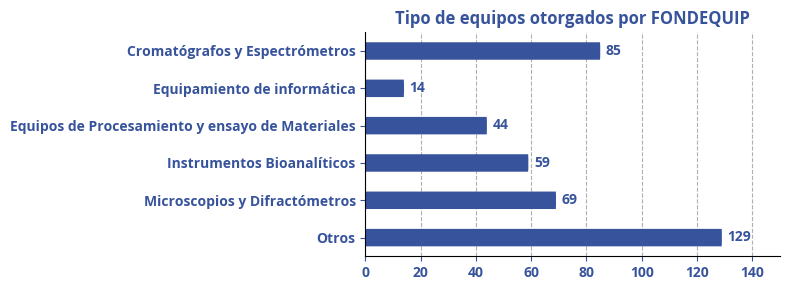

In [45]:
tipo = []
for i in excel['Tipo de Equipamiento']:
  tipo.append(i)

df_tipo = pd.DataFrame({'Tipo': np.flip(np.unique(np.array(tipo))),
                                 'Frecuencia': np.zeros(len(np.unique(np.array(tipo))), dtype=int)})
df_tipo.set_index('Tipo', inplace=True)

for i in tipo:
  df_tipo.loc[i] += 1

ax = df_tipo.plot.barh(legend=False, figsize=(8, 3))#(y='Frecuencia', autopct='%1.1f%%', textprops={'fontsize': 8},
                        #  colors=['skyblue', 'orange'])
plt.ylabel(None)
plt.title(' ')
for i, v in enumerate(df_tipo['Frecuencia']):
    ax.text(v + 2, i - 0.1, str(v))
plt.xlim((0,150))
round_corners(ax)
ax.grid(False, axis='y')
plt.title('Tipo de equipos otorgados por FONDEQUIP')
plt.tight_layout()
plt.savefig(base_dir + '/tipo_equipams.png')
plt.savefig(base_dir + '/tipo_equipams.svg')
plt.show()

### Plataformas de información: índice de datos abiertos, útiles y reutilizables (OURdata)

In [46]:
df = pd.read_excel(base_dir+'/disp_datos.xlsx', index_col=0)
df = df.rename({np.nan: ''})
df = df[['Disponibilidad de datos','Accesibilidad de datos','Apoyo del gobierno a la reutilización de datos']]
df.head()

,Disponibilidad de datos,Accesibilidad de datos,Apoyo del gobierno a la reutilización de datos
País,,,
América Latina y el Caribe,0.137404,0.181910,0.111962
OCDE,0.197880,0.233711,0.172962
,NaN,NaN,NaN
Dominica,0.000000,0.000000,0.000000
Bahamas,0.036667,0.000000,0.000000


In [47]:
labels

[10.44, '', '', '', '', '', '', '', '']

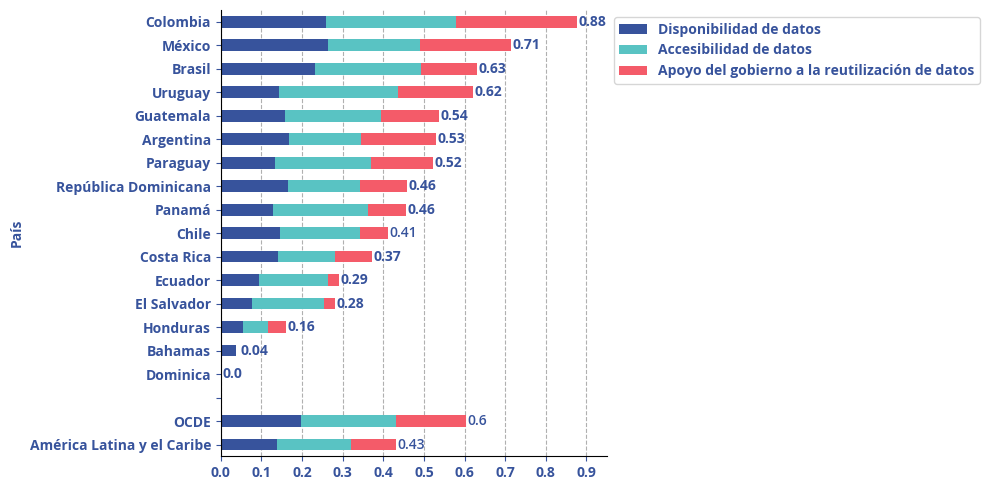

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
df.plot.barh(stacked=True, ax=ax)
labels= np.round(ax.containers[0].datavalues + ax.containers[1].datavalues + ax.containers[2].datavalues,2)
barlabels = ax.bar_label(ax.containers[2], labels=labels, padding=1)
#for c in ax.containers:
#  labels = [np.round(v,2) if v>5 else '' for v in c.datavalues]
#  ax.bar_label(c, labels=labels, fontsize=6, label_type='center')#, fmt='%:.1f%%')
barlabels[2].set_color('white')
barlabels[4].set_position((14,0))
barlabels[9].set_font_properties({'weight':'semibold'})
ax.legend(bbox_to_anchor=(1,1))
barlabels[0].set_font_properties({'weight':'semibold'})
barlabels[1].set_font_properties({'weight':'semibold'})
ax.grid(False, axis='y')
ax.set_xlim((0, 0.95))
ax.grid(axis='x',linestyle='--')
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
#round_corners(ax)
plt.tight_layout()
plt.savefig(base_dir + '/OURdata.png')
plt.savefig(base_dir + '/OURdata.svg')
plt.show()

## Capital de riesgo

### Distribución de la inversión por actividad económica

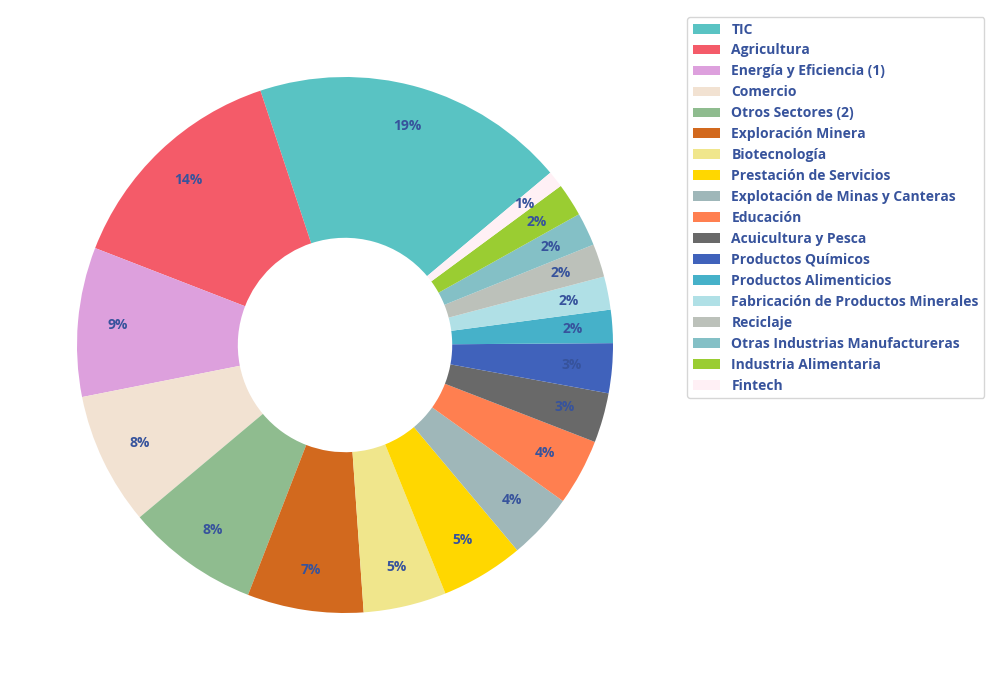

In [49]:
labels = ['TIC', 'Agricultura', 'Energía y Eficiencia (1)', 'Comercio', 'Otros Sectores (2)', 'Exploración Minera',
          'Biotecnología', 'Prestación de Servicios', 'Explotación de Minas y Canteras', 'Educación', 'Acuicultura y Pesca', 'Productos Químicos',
          'Productos Alimenticios', 'Fabricación de Productos Minerales', 'Reciclaje', 'Otras Industrias Manufactureras', 'Industria Alimentaria', 'Fintech']
values = [19, 14 , 9, 8, 8, 7,
          5, 5 , 4, 4, 3, 3,
          2, 2, 2, 2, 2, 1]

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"))
patches = ax.pie(values, wedgeprops=dict(width=0.6), startangle=40,
                       autopct='%1.0f%%', pctdistance=0.85,
                 colors=[COLOR_PALETTE[1], COLOR_PALETTE[2], 'plum', COLOR_PALETTE[10], 'darkseagreen',
                         'chocolate', 'khaki', 'gold', COLOR_PALETTE[4], 'coral',
                         'dimgray', COLOR_PALETTE[6], COLOR_PALETTE[7], 'powderblue',
                         COLOR_PALETTE[9], COLOR_PALETTE[8], 'yellowgreen', 'lavenderblush'])
ax.legend(patches[0], labels, bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig(base_dir +'/vc_actividad_econom.png')
plt.savefig(base_dir +'/vc_actividad_econom.svg')
plt.show()

### Evolución inversión total según tipo de fondos de inversión

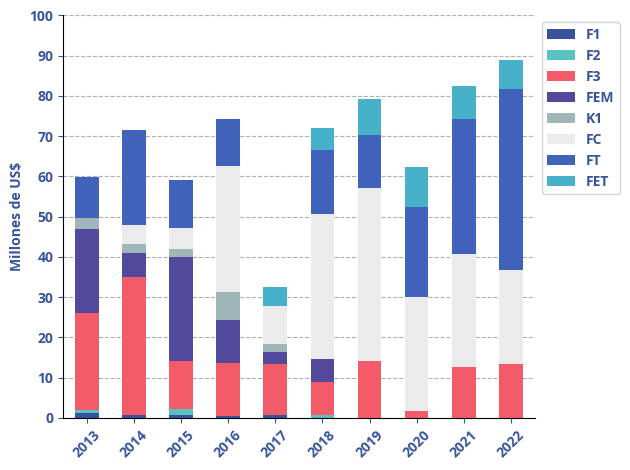

In [50]:
### PENDIENTE N°1 ###
df = pd.DataFrame({2013: [1.14, 0.95, 23.92, 20.89, 2.85, 0, 10.06, 0], 2014: [0.76, 0, 34.18, 6.07, 2.09, 4.75, 23.73, 0],
                   2015: [0.76, 1.52, 11.77, 25.82, 2.09, 5.32, 11.77, 0], 2016:[0.38, 0, 13.29, 10.63, 7.03, 31.33, 11.58, 0],
                   2017:[0.76, 0, 12.72, 2.85, 2.09, 9.49, 0, 4.56], 2018: [0, 0.76, 8.16, 5.7, 0, 36.08, 15.95, 5.31],
                   2019:[0, 0, 14.05, 0, 0, 43.1, 13.1, 9.12], 2020: [0, 0, 1.71, 0, 0, 28.29, 22.4, 9.88],
                   2021: [0, 0, 12.72, 0, 0, 28.1, 33.42, 8.35], 2022: [0, 0, 13.48, 0, 0, 23.17, 45, 7.21]},
                  index=['F1', 'F2', 'F3', 'FEM', 'K1', 'FC', 'FT', 'FET']).T
ax = df.plot.bar(stacked=True, rot=45)
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel('Millones de US$')
ax.grid(False, axis='x')
ax.set_yticks(list(range(0,101,10)))
ax.set_ylim((0,100))
plt.tight_layout()
plt.savefig(base_dir + '/inv_total_segun_tipo_fondo_inversion.png')
plt.savefig(base_dir + '/inv_total_segun_tipo_fondo_inversion.svg')

### Nuevas empresas beneficiarias de fondos de inversión

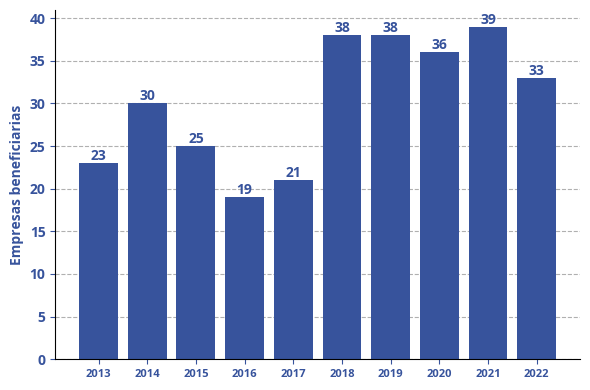

In [51]:
years = list(range(2013,2023))
values= [23, 30, 25, 19, 21, 38, 38, 36, 39, 33]
fig, ax = plt.subplots(figsize=(6,4))
ax.bar(years, values)
ax.set_xticks(years)
ax.bar_label(ax.containers[0])
ax.grid(axis='y', linestyle='--')
ax.tick_params(axis='x', labelsize=8)
ax.set_ylabel('Empresas beneficiarias')
plt.tight_layout()
plt.savefig(base_dir + '/empresas_beneficiarias_vc.png')
plt.savefig(base_dir + '/empresas_beneficiarias_vc.svg')
plt.show()